In [10]:
import torch
import torch.nn as nn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


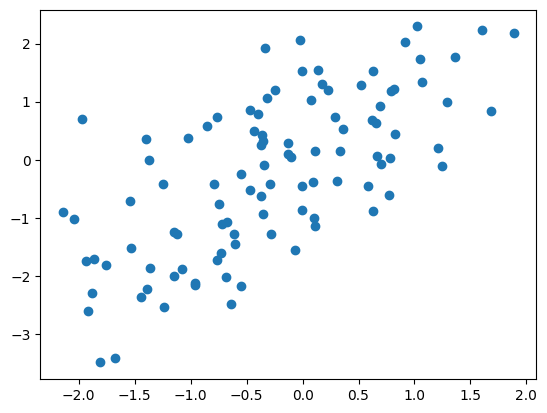

In [26]:
# creating data
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# plot
plt.scatter(x,y)
plt.show()

In [27]:
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(),      # activation function
    nn.Linear(1,1)     # output layer
)

In [28]:
# model meta paramters
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate)

In [29]:
# select training data (hard coded)
trainidx = np.random.choice(range(N),80, replace = False)
trainBool = np.zeros(N, dtype = bool)
trainBool[trainidx] = True

print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [30]:
numepochs = 500
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x[trainBool])

    # compute loss
    loss = lossfun(yHat, y[trainBool])

    # back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [31]:
# compute the losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testLoss = (predYtest-y[~trainBool]).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss : {loss.detach():.2}')
print(f'Final TEST loss : {testLoss.detach():.2}')

Final TRAIN loss : 0.96
Final TEST loss : 1.4


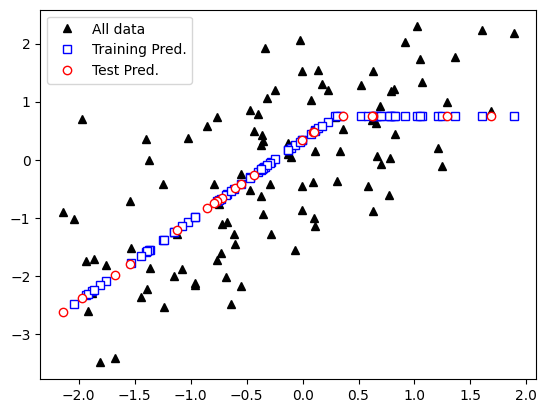

In [32]:
# plotting data

predYtrain = ANNreg(x[trainBool]).detach()

# now plot
plt.plot(x,y,'k^', label = 'All data')
plt.plot(x[trainBool], predYtrain, 'bs', markerfacecolor = 'w', label = 'Training Pred.')
plt.plot(x[~trainBool], predYtest.detach(),'ro',markerfacecolor = 'w', label = "Test Pred.")
plt.legend()
plt.show()